In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt

home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

In [2]:
# data_dir = '/project/projectdirs/desi/target/analysis/truth/dr7.1/matched/'
data_dir = '/data/roz18/truth/dr7.1/matched/'

-------
## DEEP2

In [3]:
cat = Table.read(data_dir+'deep2-field3-match.fits')
print(len(cat))

11467


In [4]:
cat[:5]

FIELD,SUBFIELD,OBJNO,RA,DEC,B,R,I,BERR,RERR,IERR,PGAL,RG,BADFLAG,ZHELIO,ZHELIO_ERR,ZQUALITY,SFD_EBV,SOURCE,MASK_WEIGHT,OBJ_WEIGHT,SELECT_WEIGHT,PHOT_WEIGHT,TARG_WEIGHT,ZSUCCESS_WEIGHT,FINAL_WEIGHT,KRON_RADIUS_HI,KRON_RADIUS_LOW,FLUX_RADIUS_HI,FLUX_RADIUS_LOW,FLAG_GALFIT_HI,FLAG_GALFIT_LOW,MAG_GALFIT_HI,MAG_GALFIT_LOW,RE_GALFIT_HI,RE_GALFIT_LOW,N_GALFIT_HI,N_GALFIT_LOW,BA_GALFIT_HI,BA_GALFIT_LOW,PA_GALFIT_HI,PA_GALFIT_LOW,SKY_GALFIT_HI,SKY_GALFIT_LOW,MAGERR_GALFIT_HI,MAGERR_GALFIT_LOW,REERR_GALFIT_HI,REERR_GALFIT_LOW,NERR_GALFIT_HI,NERR_GALFIT_LOW,BAERR_GALFIT_HI,BAERR_GALFIT_LOW,PAERR_GALFIT_HI,PAERR_GALFIT_LOW,VIS_MORPH,SIGMA_KMS,OII_3726,OII_3726_ERR,OII_3729,OII_3729_ERR,OII_3727,OII_3727_ERR,OII_3727_EW,OII_3727_EW_ERR,CFHTLS_U,CFHTLS_G,CFHTLS_R,CFHTLS_I,CFHTLS_Z,CFHTLS_UERR,CFHTLS_GERR,CFHTLS_RERR,CFHTLS_IERR,CFHTLS_ZERR,WISE_FLUX [4],WISE_FLUX_IVAR [4],MAGGIES [12],IVARMAGGIES [12]
int16,int16,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,uint8,float32,float32,int16,float32,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
3,31,31000053,352.067316837,-0.0711062453444,24.3136,24.0329,23.3506,0.0915769,0.0803541,0.0566095,3.0,2.03108,0,0.960001,3.88072e-05,4,0.0366115,DEEP,0.072894,0.797807,0.578359,1.05,1.81548,-1.0,-1.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,,69.3678,3.86942e-17,1.02055e-17,5.30058e-17,1.39801e-17,9.17e-17,1.73088e-17,90.8036,17.1396,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.689853 .. 0.0,0.567148 .. 0.0,1.88168e-10 .. 0.0,3.78924e+21 .. 0.0
3,31,31000054,352.064601113,-0.0738877370833,24.1242,23.9515,23.9282,0.0706993,0.0684614,0.0837187,3.0,1.866,0,0.898776,-5.0,1,0.0364473,DEEP,0.111655,0.0859951,0.317539,1.05,3.30668,-1.0,-1.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-1.54376 .. 0.0,0.544344 .. 0.0,2.24041e-10 .. 0.0,4.35038e+21 .. 0.0
3,31,31000060,352.049985653,-0.0966215714267,24.6361,23.8394,23.2681,0.147373,0.0682551,0.0885872,0.999348,1.41587,0,0.462428,2.08433e-05,4,0.0355308,DEEP-SDSS82,0.111655,0.95285,0.622889,1.05,1.68569,-1.0,-1.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,,37.8091,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,24.7567,24.9314,24.1026,23.6512,22.9307,0.638683,0.265227,0.182544,0.17833,0.352108,-4.90108 .. 0.0,0.520287 .. 0.0,1.39815e-10 .. 0.0,2.72634e+21 .. 0.0
3,31,31000061,352.045163142,-0.0969998730868,26.2453,23.7683,22.642,0.789923,0.0768035,0.0497532,0.719255,1.5353,0,0.862929,0.000154357,3,0.0353773,DEEP-SDSS82,0.439384,0.719255,0.554121,1.05,1.89489,-1.0,-1.0,-999.0,-999.0,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,,0.715571,4.16615e-20,4.16615e-20,4.16926e-20,4.16926e-20,8.33541e-20,8.33541e-20,0.081934,0.081934,-99.0,-99.0,23.9613,22.808,21.7089,-99.0,-99.0,0.20877,0.111451,0.154713,1.97096 .. 0.0,0.521067 .. 0.0,3.17605e-11 .. 0.0,1.87166e+21 .. 0.0
3,31,31000139,352.051325729,-0.0742441589504,24.3421

In [16]:
mask = (cat['ZQUALITY']==4) & (cat['ZHELIO']>0)
print(np.sum(mask)/len(cat)*100)

mask = (cat['ZQUALITY']==3) & (cat['ZHELIO']>0)
print(np.sum(mask)/len(cat)*100)

mask = (cat['ZQUALITY']>=3) & (cat['ZHELIO']>0)
print(np.sum(mask)/len(cat)*100)

57.4256562309
13.2728699747
70.6985262056


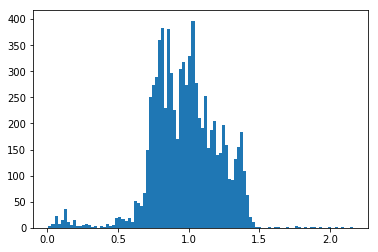

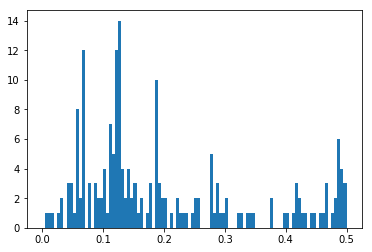

In [17]:
mask = (cat['ZQUALITY']>=3) & (cat['ZHELIO']>0)

plt.hist(cat['ZHELIO'][mask], 100)
plt.show()
plt.hist(cat['ZHELIO'][mask], 100, range=(0, 0.5))
plt.show()

-------
## GAMA

In [12]:
cat = Table.read(data_dir+'GAMA-DR3-SpecObj-match.fits')
print(len(cat))

158871


In [13]:
cat[:5]

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG
int32,str23,int16,int16,int16,float32,str33,str9,int16,float64,float64,float32,float64,float32,int16,float32,str67,str88,str92
6802,GAMAJ113601.43+004315.3,4104,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,0.05054,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_187.png
6806,GAMAJ113605.47+004221.3,4104,1,1,0.07,G12_Y1_AN1_238,GAMA,5,174.02279,0.70594,3727.79,8856.73,0.33124,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y1_AN1_238.png
6808,GAMAJ113624.17+003932.1,4104,1,1,0.08,G12_Y1_AN1_235,GAMA,5,174.10071,0.65891,3727.79,8856.73,0.22936,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y1_AN1_235.png
6810,GAMAJ113626.18+004814.0,4104,1,1,0.05,G12_Y2_041_164,GAMA,5,174.10908,0.8039,3727.91,8858.93,0.3263,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y2_041_164.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y2_041_164.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y2_041_164.png
6813,GAMAJ113615.31+003840.3,4104,1,1,0.05,G12_Y3_017_177,GAMA,5,174.06383,0.64454,3727.71,8857.67,0.48457,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_177.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_177.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_177.png


In [14]:
mask = (cat['NQ']==4)
print(np.sum(mask)/len(cat)*100)
print(np.unique(cat[mask]['SURVEY']))

81.4856078202
  SURVEY 
---------
2dFGRS   
GAMA     
MGC      
SDSS     
WiggleZ  


In [15]:
mask = (cat['NQ']==5)
print(np.sum(mask)/len(cat)*100)
print(np.unique(cat[mask]['SURVEY']))

12.5712055693
  SURVEY 
---------
SDSS     


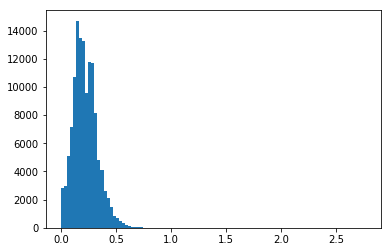

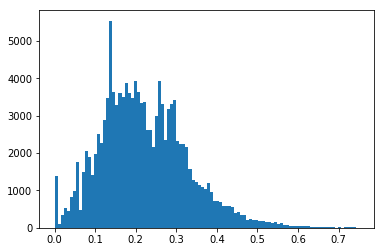

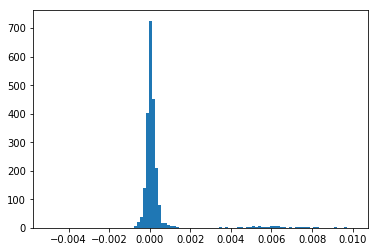

In [17]:
mask = (cat['NQ']==4)

plt.hist(cat['Z'][mask], 100)
plt.show()

plt.hist(cat['Z'][mask], 100, range=(0, 0.75))
plt.show()

plt.hist(cat['Z'][mask], 100, range=(-0.005, 0.01))
plt.show()

-------
## WiggleZ

In [19]:
cat = Table.read(data_dir+'wigglez.final-match.fits')
print(len(cat))

221177


In [20]:
cat[:5]

WiggleZ_Name,RA,Dec,redshift,Dredshift,Q,FUV,NUV,u,g,r,i,z,DFUV,DNUV,Du,Dg,Dr,Di,Dz,E(B-V),class,UTdate,MFUV,Mass,DMass,SpecFile,comments
str22,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,int64,float64,float64,float64,str14,str28
R01J003003964+04292093,7.5165551,4.48912,0.35718,0.00015,5,23.92,22.63,nan,22.43,21.72,nan,21.21,0.25,0.2,nan,0.05,0.03,nan,0.07,0.017,WIG_RCS2,20090923,-18.39,9.52,0.15,wig000001.fits,N/A
R01J003004997+04061148,7.520857,4.10316,0.53924,0.00083,3,25.13,22.55,nan,21.75,20.72,nan,19.84,0.62,0.31,nan,0.03,0.02,nan,0.03,0.0181,WIG_RCS2,20090923,-19.44,10.66,0.1,wig000002.fits,N/A
R01J003005218+03541369,7.521778,3.903775,0.28689,0.00014,5,23.02,21.9,nan,20.74,20.01,nan,19.45,0.23,0.14,nan,0.02,0.01,nan,0.03,0.0215,WIG_RCS2,20090923,-18.61,nan,nan,wig000003.fits,N/A
R01J003005418-02154809,7.522612,-2.263387,0.22012,2e-05,4,23.29,21.44,nan,22.75,21.82,nan,20.68,0.38,0.17,nan,0.41,0.25,nan,8.0,0.0346,WIG_RCS2,20090924,-18.45,nan,nan,wig000004.fits,N/A
R01J003005746-02050496,7.523977,-2.084738,0.69012,0.00019,4,24.43,22.15,nan,22.86,22.39,nan,21.95,0.91,0.19,nan,0.05,0.07,nan,0.1,0.0291,WIG_RCS2,20090924,-20.45,9.79,0.09,wig000005.fits,N/A


65.9919431044


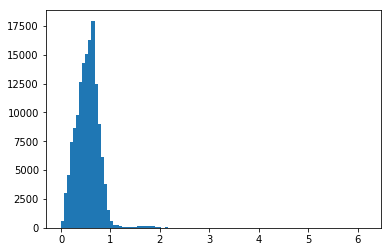

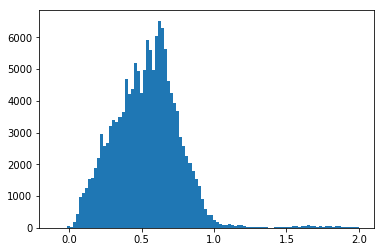

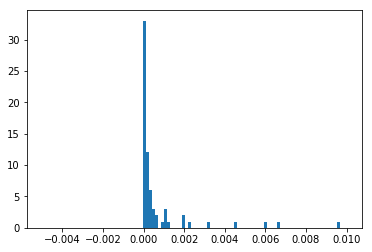

In [21]:
mask = ((cat['Q']==4) | (cat['Q']==5)) & (cat['redshift']>0)
print(np.sum(mask)/len(cat)*100)

plt.hist(cat['redshift'][mask], 100)
plt.show()

plt.hist(cat['redshift'][mask], 100, range=(-0.1, 2))
plt.show()

plt.hist(cat['redshift'][mask], 100, range=(-0.005, 0.01))
plt.show()

-------
## OzDES

In [22]:
cat = Table.read(data_dir+'OzDES-DR1-match.fits')
print(len(cat))

5324


In [23]:
cat[:5]

OzDES_ID,RA,DEC,z,flag,types
str12,float64,float64,float32,str4,str70
OzDES_000001,35.55125,-4.78397222222,0.72434,4,StrongLens
OzDES_000002,37.0239166667,-5.29522222222,1.24552,3,StrongLens
OzDES_000003,36.0966666667,-4.72233333333,0.86767,3,StrongLens
OzDES_000059,35.1156666667,-5.79022222222,0.84606,3,ClusterGalaxy
OzDES_000060,35.3328333333,-6.82322222222,0.67718,4,ClusterGalaxy


In [24]:
t = Table()
t['type'], t['counts'] = np.unique(cat['types'], return_counts=True)
t.sort('counts')
t.reverse()
t.pprint(max_lines=-1)

                                 type                                  counts
---------------------------------------------------------------------- ------
LRG                                                                      1595
BrightGalaxy                                                              805
ELG                                                                       530
AGN_monitoring                                                            499
ClusterGalaxy                                                             330
AGN_reverberation                                                         315
Photo-z                                                                   311
BrightStar                                                                270
RedMaGiC                                                                  256
Tertiary                                                                  179
FStar                                                           

In [25]:
types_to_keep = ['LRG', 'BrightGalaxy', 'ELG', 'Photo-z', 'RedMaGiC', 'ClusterGalaxy']

mask_type = np.zeros(len(cat), dtype=bool)
for type_str in types_to_keep:
    mask_type |= np.array([aa.rfind(type_str) for aa in cat['types']])>=0
    
print(np.sum(mask_type)/len(cat))
t = Table()
t['type'], t['counts'] = np.unique(cat['types'][mask_type], return_counts=True)
t.sort('counts')
t.reverse()
t.pprint(max_lines=-1)

0.723328324568
                                 type                                  counts
---------------------------------------------------------------------- ------
LRG                                                                      1595
BrightGalaxy                                                              805
ELG                                                                       530
ClusterGalaxy                                                             330
Photo-z                                                                   311
RedMaGiC                                                                  256
ClusterGalaxy,LRG                                                           7
BrightGalaxy,Tertiary                                                       4
BrightGalaxy,BrightStar                                                     2
LRG,Photo-z                                                                 2
ELG,Photo-z                                      

31.9684447784


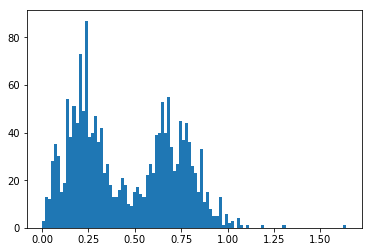

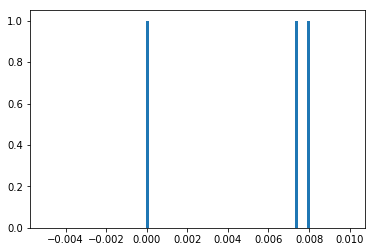

In [27]:
mask = mask_type & (np.array(cat['flag'], dtype=float)==4) & (cat['z']>0)
print(np.sum(mask)/len(cat)*100)
plt.hist(cat['z'][mask], 100)
plt.show()

plt.hist(cat['z'][mask], 100, range=(-0.005, 0.01))
plt.show()

-------
## 2dFLenS

In [28]:
cat = Table.read(data_dir+'2dflens-match.fits')
print(len(cat))

18353


In [29]:
cat[:5]

R.A.,Dec.,z,qual,target,umag,gmag,rmag,imag,zmag,w1mag
float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64
59.370961,-12.083557,0.23735,4,6,20.24,19.24,18.74,18.53,18.23,98.97
59.334533,-12.019238,0.37576,4,2,33.54,20.86,19.08,18.47,18.08,98.97
59.07884,-12.007216,0.559,3,3,23.43,22.07,20.33,19.45,18.73,98.97
59.454999,-11.970705,0.62831,3,3,21.18,20.73,20.01,19.29,19.11,98.97
58.814815,-11.952672,0.15899,3,6,20.59,18.89,17.79,17.39,17.01,98.97


57.4837901161


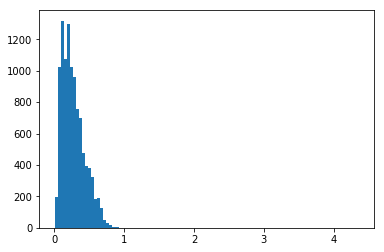

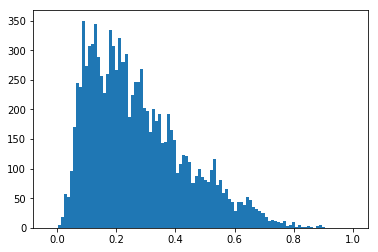

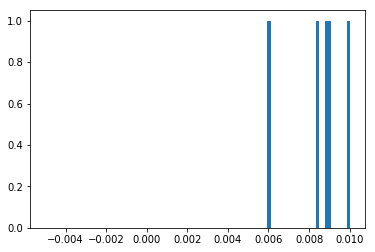

In [30]:
mask = (cat['qual']==4) & (cat['z']>0)
print(np.sum(mask)/len(cat)*100)

plt.hist(cat['z'][mask], 100)
plt.show()

plt.hist(cat['z'][mask], 100, range=(-0.03, 1))
plt.show()

plt.hist(cat['z'][mask], 100, range=(-0.005, 0.01))
plt.show()

-------
## VVDS

In [31]:
cat = Table.read(data_dir+'cesam_vvds_spF02_DEEP_Full-match.fits')
print(len(cat))

10856


In [32]:
cat[:5]

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U_CFH12K,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R_CFH12K,MAG_I_CFH12K,MAGERR_AUTO_I_CFH12K,MAG_U_CFHTLS,MAGERR_AUTO_U,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R,MAG_I_CFHTLS,MAGERR_AUTO_I,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII

20.7074428887


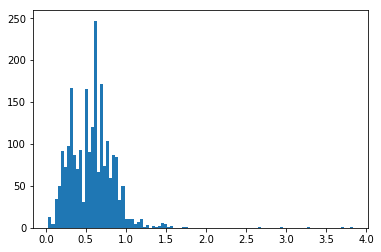

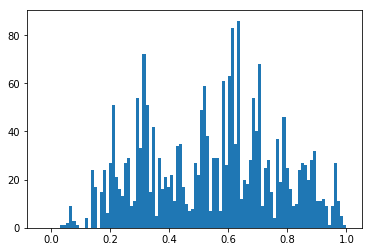

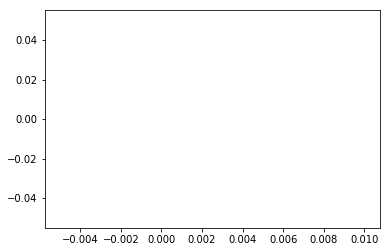

In [33]:
mask = (cat['ZFLAGS']==4) & (cat['Z']>0)
print(np.sum(mask)/len(cat)*100)
plt.hist(cat['Z'][mask], 100)
plt.show()

plt.hist(cat['Z'][mask], 100, range=(-0.03, 1))
plt.show()

plt.hist(cat['Z'][mask], 100, range=(-0.005, 0.01))
plt.show()

-------
## 6dFGS

In [34]:
cat = Table.read(data_dir+'6dFGS-match.fits')
print(len(cat))

24312


In [35]:
cat[:5]

RAJ2000,DEJ2000,6dFGS,Nm,Nz,bJmag,PrID,rFmag,S_G,f_cz,cz,e_cz,r_cz,q_cz,AV,w,Target,Template,SpecID
float64,float64,str15,uint8,uint8,float32,int16,float32,uint8,int16,int32,int16,int16,uint8,float32,uint8,int32,str9,str29
0.0184583333333,-0.0833333333333,g0000044-000500,0,0,15.87,1,14.65,1,0,5400,100,5,9,0.11,8,6,Z,0
0.0210416666667,-5.20938888889,g0000051-051234,1,1,15.4,1,14.43,1,0,11368,45,126,4,0.1,8,7,3,116638
0.028,-7.87505555556,g0000067-075230,1,1,17.05,1,15.54,1,0,25174,45,126,4,0.13,8,9,1,450
0.032625,-0.0406388888889,g0000078-000226,1,1,15.94,1,15.0,1,0,7140,45,126,4,0.11,8,12,3,372
0.036,-6.374,g0000086-062226,1,1,15.08,1,13.92,1,0,6531,45,126,4,0.15,8,15,3,472


87.3889437315


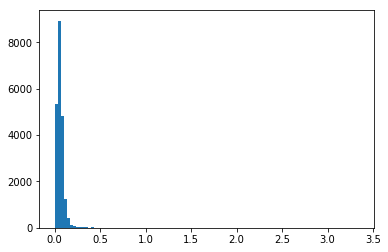

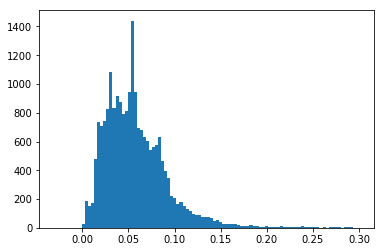

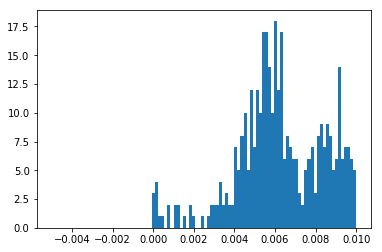

In [45]:
mask = (cat['q_cz']==4) & (cat['cz']>0)
print(np.sum(mask)/len(cat)*100)
plt.hist(cat['cz'][mask]/3e5, 100)
plt.show()

plt.hist(cat['cz'][mask]/3e5, 100, range=(-0.03, 0.3))
plt.show()

plt.hist(cat['cz'][mask]/3e5, 100, range=(-0.005, 0.01))
plt.show()

-------
## 2dFGRS

In [46]:
cat = Table.read(data_dir+'2dFGRS-match.fits')
print(len(cat))

81786


In [47]:
cat[:5]

SeqNum,o_SeqNum,Name,UKST,Bjmag,Bjsel,Bjmag_o,Bjsel_o,Gext,Bjmag_S,Rmag_S,ObsRun,z_obs,z,q_z,n_z,z_abs,T,Rx,z_em,o_z_em,SNR,eta,RAJ2000,DEJ2000
str6,int32,str10,str3,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,int32,int32,float64,int32,float64,float64,int32,float64,float64,float64,float64
199284,2,TGN159Z061,782,19.321,19.156,19.47,19.35,0.165,19.558,18.997,01MAY,0.0,0.0,1,2,0.0,0,0.0,0.1282,1,1.7,0.0,157.63525,-4.17580555556
206109,1,TGN161Z325,783,19.053,18.829,19.07,18.91,0.224,19.057,17.496,99FEB,0.0,0.0,1,2,0.0,0,0.0,0.1763,1,0.6,0.0,160.721625,-4.07533333333
240672,1,TGN133Z135,790,19.023,18.905,19.03,18.96,0.118,19.207,18.356,02MAR,0.0,0.0,1,1,0.0,0,0.0,0.1231,1,0.9,0.0,196.608458333,-3.84188888889
309389,1,TGN327Z016,862,18.743,18.665,18.93,18.88,0.078,18.88,17.945,99MAR,0.0,0.0,1,2,0.0,0,0.0,0.0074,1,1.2,0.0,196.200875,0.655305555556
193552,1,TGN156Z001,781,18.52,18.379,18.48,18.37,0.141,18.496,17.143,99JAN,0.0976,0.0977,4,1,0.0976,1,12.3,0.0,0,27.1,-3.2329,153.131208333,-3.85375


86.3497420096


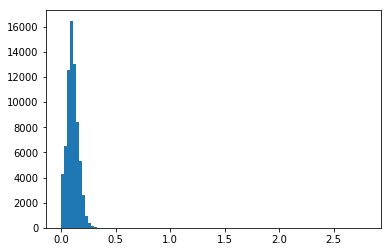

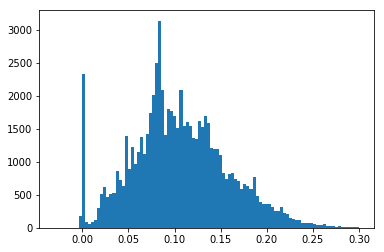

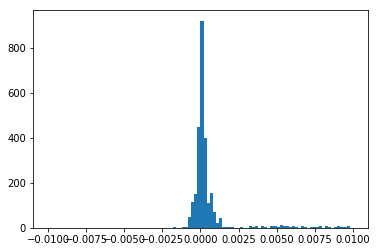

In [48]:
mask = (cat['q_z']>=4)
print(np.sum(mask)/len(cat)*100)
plt.hist(cat['z'][mask], 100)
plt.show()
plt.hist(cat['z'][mask], 100, range=(-0.03, 0.3))
plt.show()
plt.hist(cat['z'][mask], 100, range=(-0.01, 0.01))
plt.show()

83.2807570978


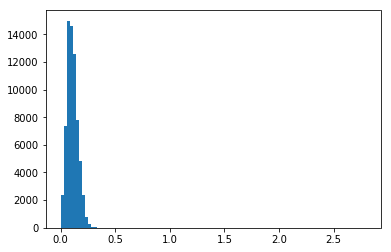

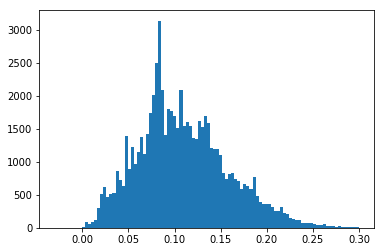

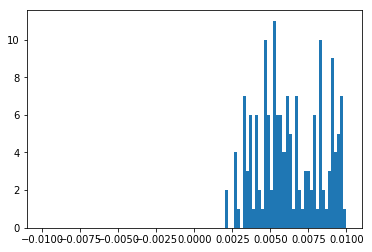

In [49]:
# Remove the z~0 peak
mask = (cat['q_z']>=4) & (cat['z']>0.002)
print(np.sum(mask)/len(cat)*100)
plt.hist(cat['z'][mask], 100)
plt.show()
plt.hist(cat['z'][mask], 100, range=(-0.03, 0.3))
plt.show()
plt.hist(cat['z'][mask], 100, range=(-0.01, 0.01))
plt.show()